<a href="https://colab.research.google.com/github/Akshara416/OpenCV-projects/blob/master/cricket_shot_analysis/cricket_shot_extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install pillow==4.1.1
%reload_ext autoreload
%autoreload

In [ ]:
pip install -r /content/drive/MyDrive/Cricket_shots_analysis/Code/bat_requirements.txt

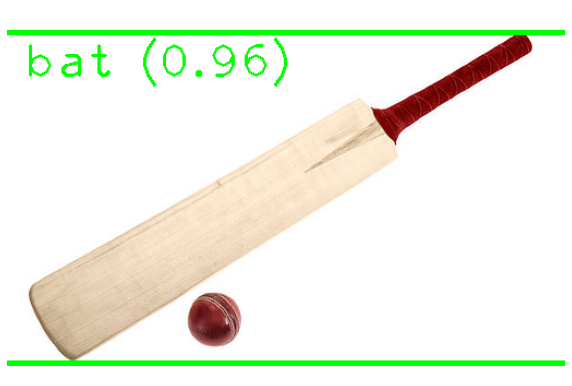

bat
0.96


In [ ]:
import sys
sys.path.insert(0,'/content/drive/MyDrive/Cricket_shots_analysis/Code/')

from predict_bat import predict_bat
det = predict_bat(img_path='/content/drive/MyDrive/Cricket_shots_analysis/images/bat_images/bat_1.jpg', plot_img=True)
category = det[0].categories[0]        
label = category.label
probability = round(category.score, 2)
print(label)
print(probability)

In [ ]:
!git clone https://github.com/taipingeric/yolo-v4-tf.keras.git

Cloning into 'yolo-v4-tf.keras'...
remote: Enumerating objects: 1383, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 1383 (delta 2), reused 0 (delta 0), pack-reused 1377
Receiving objects: 100% (1383/1383), 29.83 MiB | 13.87 MiB/s, done.
Resolving deltas: 100% (716/716), done.


In [ ]:
import sys
sys.path.insert(0,'/content/yolo-v4-tf.keras/')
from models import Yolov4
predict_ball = Yolov4(weight_path='/content/drive/MyDrive/Cricket_shots_analysis/yolo/yolov4.weights', 
               class_name_path='/content/yolo-v4-tf.keras/class_names/coco_classes.txt')

nms iou: 0.413 score: 0.3
all weights read
load from /content/drive/MyDrive/Cricket_shots_analysis/yolo/yolov4.weights


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


img shape:  (334, 500, 3)
# of bboxes: 3


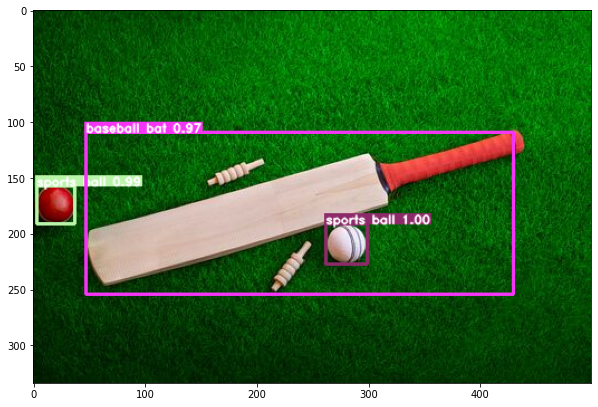

In [ ]:
import cv2, matplotlib.pyplot as plt

img = cv2.imread('/content/drive/MyDrive/Cricket_shots_analysis/images/bat_images/bat_2.jpg',1)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img, pred = predict_ball.predict_img(img, plot_img=True, return_output=True)


In [ ]:
pred

,x1,y1,x2,y2,class_name,score,w,h
0,262,191,299,227,sports ball,0.995638,37,36
1,3,157,37,191,sports ball,0.992011,34,34
2,47,109,430,254,baseball bat,0.969611,383,145


In [ ]:
if 'sports ball' in list(pred.class_name):
  score = pred[pred.class_name=='sports ball'].score.values[0]
  if score>0.1:
    print("Ball detected with a confidence of ", round(score,3))

Ball detected with a confidence of  0.996


# Combining bat and ball detection  

In [ ]:
#img = cv2.imread('/content/drive/MyDrive/Cricket_shots_analysis/images/ball.jpg')
#img

In [28]:
import cv2 

# Create a video capture object, in this case we are reading the video from a file
vid_capture = cv2.VideoCapture('/content/drive/MyDrive/Cricket_shots_analysis/videos/cricket_shots.mp4')

if (vid_capture.isOpened() == False):
    print("Error opening the video file")
# Read fps and frame count
else:
    fps = vid_capture.get(5)
    print('Frames per second : ', fps,'FPS')
    frame_count = vid_capture.get(7)
    print('Frame count : ', frame_count)

Frames per second :  30.0 FPS
Frame count :  7719.0


In [ ]:
#!git clone https://github.com/taipingeric/yolo-v4-tf.keras.git

In [ ]:
import sys
sys.path.insert(0,'/content/drive/MyDrive/Cricket_shots_analysis/Code/')

from predict_bat_new import predict_bat


sys.path.insert(0,'/content/yolo-v4-tf.keras/')
from models import Yolov4
predict_ball = Yolov4(weight_path='/content/drive/MyDrive/Cricket_shots_analysis/yolo/yolov4.weights', 
               class_name_path='/content/yolo-v4-tf.keras/class_names/coco_classes.txt')

nms iou: 0.413 score: 0.3
all weights read
load from /content/drive/MyDrive/Cricket_shots_analysis/yolo/yolov4.weights


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [29]:
skip_frames = 30  # i.e. at 30 fps, this advances one second
vid_capture.set(cv2.CAP_PROP_POS_FRAMES, skip_frames*4)

True

In [ ]:
# count= 0
# frame_width = int(vid_capture.get(3))
# frame_height = int(vid_capture.get(4))

# out = cv2.VideoWriter("output.avi", cv2.VideoWriter_fourcc(*"MJPG"), fps,(frame_width, frame_height))

# while(vid_capture.isOpened()):
#     count+=1
#     print(count)
#     ret, frame = vid_capture.read()
    

#     #import matplotlib.pyplot as plt
#     #plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
#     #plt.show()

#     #if count > 50:
#     #      break
    
#     if ret == True and count<25:
#       frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
#       det = predict_bat(frame,plot_img=True)
#       pred = predict_ball.predict(frame, plot_img=True)
#       frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
#       frame = cv2.resize(frame, (frame_width, frame_height))
#       out.write(frame)
#       #import matplotlib.pyplot as plt
#       #plt.imshow(frame)
#       #plt.show()
#     else:
#         break
#     #if count>25:
#     #  break

# # Release the video capture object
# #vid_capture.release()

In [ ]:
count= 0
frame_width = int(vid_capture.get(3))
frame_height = int(vid_capture.get(4))

out = cv2.VideoWriter("output.avi", cv2.VideoWriter_fourcc(*"MJPG"), fps,(frame_width, frame_height))

while(vid_capture.isOpened()):
  count+=1
  print(count)
  ret, frame = vid_capture.read()
  #plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))
  #plt.show()
  if ret == True and count<300:
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    det,img = predict_bat(frame,plot_img=True)
    image,pred = predict_ball.predict_img(img, plot_img=True, return_output=True)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (frame_width, frame_height))
    out.write(image)
  else:
    # Release the video capture object
    vid_capture.release()
    break


In [ ]:
count= 0
frame_width = int(vid_capture.get(3))
frame_height = int(vid_capture.get(4))

out = cv2.VideoWriter("output.avi", cv2.VideoWriter_fourcc(*"MJPG"), fps,(frame_width, frame_height))

while(vid_capture.isOpened()):
  count+=1
  print(count)
  ret, frame = vid_capture.read()
  #plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))
  #plt.show()
  if ret == True and count<50:
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    det,img = predict_bat(frame,plot_img=True)

    if len(det)>0:
      category = det[0].categories[0]
      
      if (category.label=='bat' and category.score>0.2) or True:
          print(category.label,"detected with a confidence of",round(category.score,3))
          image,pred = predict_ball.predict_img(img, plot_img=True, return_output=True)

          if 'sports ball' in list(pred.class_name):
            score = pred[pred.class_name=='sports ball'].score.values[0]

            if score>0.1:
              print("Ball detected with a confidence of ", round(score,3))
              image = cv2.resize(image, (frame_width, frame_height))
              out.write(image)
              #start writing the frames
              #print("Skipping one second")
              #vid_capture.set(cv2.CAP_PROP_POS_FRAMES, vid_capture.get(cv2.CAP_PROP_POS_FRAMES)+skip_frames)
            else:
              print("Ball not detected")
              image = cv2.resize(image, (frame_width, frame_height))
              out.write(image)
          else:
            print("Ball not detected")
            image = cv2.resize(image, (frame_width, frame_height))
            out.write(image)
            #print("Skipping one second")
            #vid_capture.set(cv2.CAP_PROP_POS_FRAMES, vid_capture.get(cv2.CAP_PROP_POS_FRAMES)+skip_frames)
      else:
        print("Bat not detected")
        img = cv2.resize(img, (frame_width, frame_height))
        out.write(img)
        #print("Skipping one second")
        #vid_capture.set(cv2.CAP_PROP_POS_FRAMES, vid_capture.get(cv2.CAP_PROP_POS_FRAMES)+skip_frames)
    else:
      out.write(frame)
      #print("Skipping one second")
      #vid_capture.set(cv2.CAP_PROP_POS_FRAMES, vid_capture.get(cv2.CAP_PROP_POS_FRAMES)+skip_frames)
      continue 
  else:
    # Release the video capture object
    vid_capture.release()
    break



In [31]:
vid  = cv2.VideoCapture('output.avi')
if vid.isOpened():
  print(True)

True


In [ ]:
count= 0
frame_width = int(vid_capture.get(3))
frame_height = int(vid_capture.get(4))

out = cv2.VideoWriter("output.avi", cv2.VideoWriter_fourcc(*"MJPG"), fps,(frame_width, frame_height))

while(vid_capture.isOpened()):
    count+=1
    print(count)
    ret, frame = vid_capture.read()

    #import matplotlib.pyplot as plt
    #plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    #plt.show()

    #if count > 50:
    #      break
    
    if ret == True:
      frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
      det = predict_bat(frame,plot_img=True)

      if len(det)>0:
        category = det[0].categories[0]

        if category.label=='bat' and category.score>0.2:

          print(category.label,"detected with a confidence of",round(category.score,3))

          pred = predict_ball.predict(frame, plot_img=True)

          if 'sports ball' in list(pred.class_name):
            score = pred[pred.class_name=='sports ball'].score.values[0]
            if score>0.1:
              print("Ball detected with a confidence of ", round(score,3))
              #start writing the frames
              print("Skipping one second")
              vid_capture.set(cv2.CAP_PROP_POS_FRAMES, vid_capture.get(cv2.CAP_PROP_POS_FRAMES)+skip_frames)
          else:
            print("Ball not detected")
            print("Skipping one second")
            vid_capture.set(cv2.CAP_PROP_POS_FRAMES, vid_capture.get(cv2.CAP_PROP_POS_FRAMES)+skip_frames)
            continue

        else:
          print("Bat not detected")
          print("Skipping one second")
          vid_capture.set(cv2.CAP_PROP_POS_FRAMES, vid_capture.get(cv2.CAP_PROP_POS_FRAMES)+skip_frames)
          continue

      else:
        print("Skipping one second")
        vid_capture.set(cv2.CAP_PROP_POS_FRAMES, vid_capture.get(cv2.CAP_PROP_POS_FRAMES)+skip_frames)
        continue
    else:
        break

# Release the video capture object
vid_capture.release()

In [ ]:
frame_width = int(cap.get(3))
frame_height = int(cap.get(4))
fps = int(cap.get(5))
print(fps)
frame_count = cap.get(7)
print(frame_count)
# create the `VideoWriter()` object
#out = cv2.VideoWriter('video_result.mp4', cv2.VideoWriter_fourcc(*'mp4v'), fps, 
#                      (frame_width, frame_height))
out = cv2.VideoWriter("output.avi", cv2.VideoWriter_fourcc(*"MJPG"), fps,(frame_width, frame_height))

In [ ]:
count=-1
while cap.isOpened():
  count+=1
  ret, frame = cap.read()
  print(count)
  if ret:
    out.write(frame)
  else:
    break

cap.release()

In [ ]:
vid = cv2.VideoCapture('output.avi')
if vid.isOpened():
  print("True")
else:
  print("False")